# UX 8 Correlation and Regression

Author:
- |
    Sofia Dahl, sof@create.aau.dk\
    Dept. Architecture, Design and Media Technology, Aalborg University Copenhagen
---

## Learning goals
After working your way through this notebook you should be able to..
- Explain what correlation can measure and when it is useful
- Calculate the Pearson correlation coefficient 
- Make simple linear regression

## Table of Contents
- [1 Relationship between Variables](#Relationships)  
- [2 Covariance](#Covariance)
- [3 Correlation Coefficient](#Coefficient)
    - [3.1 Interpreting the Correlation Coefficient](#InterpretCorr)
    - [3.2 Correlation as a measure of Reliability](#ReliableCorr)
    - [3.3 Linear Fit](#ReliableCorr)
- [4 Linear Regression](#Regression)
- [5 Variance Explained by Model](#VarianceExplained)

<a id= 'Summarizing'> </a>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

<a id= 'Relationships'> </a>

### 1. Relationship between Variables

We are often interested in seeing whether independent and dependent variables have some kind of relationship with each other or among themselves. A good way to study this is to plot the concerned variables against each other. 

In [5]:
# In this example we have data from 18 participants and two rating scales (0-100)

data= pd.DataFrame([[83,37],
       [93,23],
       [60,40],
       [47,16],
       [59,59],
       [77,34],
       [30,21],
       [75,45],
       [86,91],
       [100,75],
       [71,0],
       [85,100],
       [75,20],
       [55,38],
       [47,20], 
       [40,37],
       [72,48],                    
       [100,90]], 
       columns=(["Scale1","Scale2"]), 
       index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

# Check dimensions of the data structure
data.describe()

,Scale1,Scale2
count,18.000000,18.000000
mean,69.722222,44.111111
std,20.415696,28.445798
min,30.000000,0.000000
25%,56.000000,21.500000
50%,73.500000,37.500000
75%,84.500000,56.250000
max,100.000000,100.000000


### Try out 1:
Plot the variables against each other in the form of a scatter plot to see if there is a relationship between them (Scale1 and Scale2).

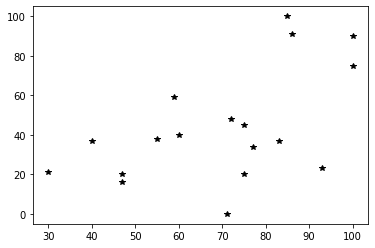

In [11]:
# Is there a relationship between the two variables (Scale1 and Scale2)?
plt.plot(data.iloc[:,0], data.iloc[:,1], 'k*')

The scatter plot indicates a tendency for high ratings on one scale to be accompanied by high ratings on the other, and vice versa. But how do we quantify this tendency?

<a id= 'Covariance'> </a>

## 2. Covariance

In the case of the variance of one variable, we summed the squared distance between each observation and the mean. To see whether two variables x and y *covary* (vary similarly), we apply a similar formula: 

$$cov(x,y)  =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {N-1}$$

Where $\bar{x},\bar{y}$ are the means of x and y respectively, while $x_i,y_i$ are the data points, and N the sample size. 

In general, if $x_i$ exceeds $\bar{x}$, and $y_i$ simultaneously exceeds $\bar{y}$ (and vice versa), this will result in a *positive* covariance value. This means that x and y vary similarly.

**Note that this does not mean that a change in x *causes* y to vary!**

In [14]:
# Get the covariance matrix of the whole data
data.cov()

# 

,Scale1,Scale2
Scale1,416.800654,317.562092
Scale2,317.562092,809.163399


### Try out 2:
Calculate the mean of the two scales and add as another variable "Scale 3" in the data frame. Calculate the covariance matrix and compare. 

In [12]:
# Add another variable consisting of the mean data of Scale1 and Scale2
#data['Scale3']=(data.Scale1 + data.Scale2)/2
#data

# calculate covariance matrix
#data.cov()

<a id= 'Coefficient'> </a>

## 3. Correlation coefficient
Covariance is useful, but not suitable to compare between different kinds of values and units. We can get around this by standardize with the sample standard deviations for x and y and get a coefficient we call r:

$$r =  \frac {cov_{xy}} {s_x s_y} =\frac {\sum{ (x_i - \bar{x}) (y_i - \bar{y})} } {(N-1){s_x s_y}}$$

Where $s_x$ and $s_y$ are the sample standard deviations for x and y. 

The standard deviations $s_x$ and $s_y$, in turn, are containing the "Sum of squares" of squared differences between individual data points and mean for x and y, respectively: $SS_{xx}=\sum{ (x_i - \bar{x})^2}$
and $SS_{yy}=\sum{ (y_i - \bar{y})^2}$
And when we look at our definition of covariance, we see that this contains something similar to a sum of squares - but where the "squaring" is a crossproduct between two variables: $SS_{xy}=\sum{ (x_i - \bar{x}) (y_i - \bar{y})}$ 
We will return to this in a bit, but first we present....(drumroll)

The *Pearson Product-Moment Correlation Coefficient* (or "correlation coefficient" for short):
$$r =  \frac {SS_{xy}} {\sqrt{(SS_{xx})(SS_{yy})}}$$

r is a standardized measure of the *linear* relationship between two variables and very handy. 

The degree to which the relationship can be explained by a linear model is expressed by the coefficient, r, as follows:


If r = 1, x and y are positively correlated (perfectly)

If r = -1, x and y are negatively correlated (perfectly)

If r = 0, x and y have no linear correlation

If r > 0 and r < 1, x and y are positively correlated (but not perfectly)

If r < 0 and r > -1, x and y are negatively correlated (but not perfectly)


In [8]:

data.corr()

,Scale1,Scale2
Scale1,1.000000,0.546822
Scale2,0.546822,1.000000


Just as in the covariance matrix, the value of r(Scale1,Scale2) is the same as r(Scale2,Scale1) and the diagonal is all 1. Because of the symmetry one therefore frequently sees correlation matrixes where the numbers above the diagonal are omitted. 


<a id= 'InterpretCorr'> </a>

### 3.1 Interpreting the correlation coefficient
So now we have a standardized measure (the Pearson correlation coefficient) that measure the strength of linear relationships between variables. If the relationship is really strong, the data points of x and y would form a straight diagonal when plottted against each other. But unless we have perfect correlation (r=1), most data points will not be exactly on the line. In the case of Scale 1 and Scale 2 above, we can clearly see that there is a distance between most data points and the diagonal (in Try out 1). Thus, the straight line accounts for some of the systematic variation in the data, while other variability is not accounted for (the error, or unsystematic variation).

Hopefully this now rings a bit familiiar.  The Pearson correlation coefficient is, in fact, a measure of the effect size, which also makes it possible to compare across different experiments. Commonly, researchers follow the guidelines of Cohen who suggested the following interpretations for r:

- Small r = 0.1
- Medium r = 0.3
- Large r = 0.5

So the correlation between Scale 1 and Scale 2 above would be considered large. *However,* just like other statistics we have calculated before, it would be sensible to investigate the confidence intervals before drawing too many conclusions. If the 95% confidence interval ranges between 0.1 and 0.9 we cannot be very sure about the true strength of the relationship.

To test that our correlation is significantly different from zero, we can calculate the t-statistic. Sauro & Lewis shows how to do this. But many statistical packages will also report the probability of obtaining the correlation by chance. 

In [7]:
# We import the stats package to use the pearsonr function

from scipy import stats

stats.pearsonr(data.Scale1, data.Scale2)
# As before, we get r, but also the p-value

(0.5468224583320977, 0.01885668866904329)

<a id= 'ReliableCorr'> </a>

### 3.2 Correlation as a Measure of Reliability
Now we an idea of whether users have a tendency to rate Scale 1 and Scale 2 in a similar way. If, for instance Scale 1 are users' responses to "How would you rate the quality of the product?" and Scale 2 is "How likely are you to buy this product?" we can see to what degree these two correlate. If they would be perfectly correlated for a number of users, perhaps we could only asking one instead of two questions? That is, is Scale 1  a reliable measure of Scale 2? This is typically something one would investigate when checking reliability for self-report measurement instruments.

We can also measure reliability by calculating the correlation coefficient for different ratings of the same stimuli. For instance, r can indicate the degree to which users tend to rate a particular stimulus the same way when presented with it several times. 

If $r$ is close to 1, it implies that the measure is reliable, as the ratings of the same stimulus show small variability.

If $r$ is close to 0, it implies that the measure is unreliable and noisy, i.e. with large variability.

### Try out 3:
When converting analog signals to digital, there are limited values that can be represented in the computer. 
In this case, we have data from a distance sensor, the produced voltage output (analog), and the converted ADC (digital) value. Plot the two latter and calculate their correlation coefficient.


(31, 3)


Text(0, 0.5, 'Voltage')

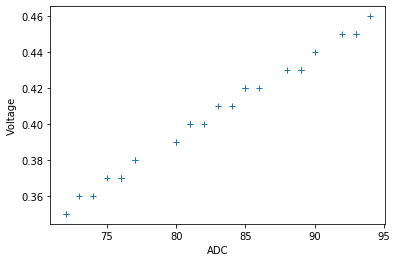

In [3]:
# Here is an excerpt from the data:
array=np.array([[1200,94,0.46],
[1210,93,0.45],
[1220,93,0.45],
[1230,92,0.45],
[1240,90,0.44],
[1250,89,0.43],
[1260,89,0.43],
[1270,89,0.43],
[1280,88,0.43],
[1290,86,0.42],
[1300,85,0.42],
[1310,85,0.42],
[1320,85,0.42],
[1330,84,0.41],
[1340,83,0.41],
[1350,82,0.40],
[1360,81,0.40],
[1370,81,0.40],
[1380,80,0.39],
[1390,80,0.39],
[1400,77,0.38],
[1410,77,0.38],
[1420,76,0.37],
[1430,76,0.37],
[1440,76,0.37],
[1450,76,0.37],
[1460,75,0.37],
[1470,74,0.36],
[1480,73,0.36],
[1490,72,0.35],
[1500,72,0.35]])

# And to make it convenient we put this in a data frame with index for the participants
index = [f'participant_{num}' for num in range(array.shape[0])] #generate row index for all entries

sensor= pd.DataFrame(array, columns=(["Distance","ADC", "Voltage"]), index=index)

#check the format of data frame
print(sensor.shape)

sensor.describe()

#one way to plot
plt.plot(sensor.ADC, sensor.Voltage, '+')

plt.xlabel('ADC')
plt.ylabel('Voltage')

#calculate correlation as above

As expected (and hoped for), the values are highly correlated. 

<a id= 'LinearFit'> </a>

### 3.3 Linear Fit
It is good to know that our measures are reliable, but we can use the concept of linear relationship for other things. 

For instance, if we want use the distance sensor in an application to measure distance, it would be highly useful to know how the ADC values correspond to physical distance (mm). One way is to plot the values.

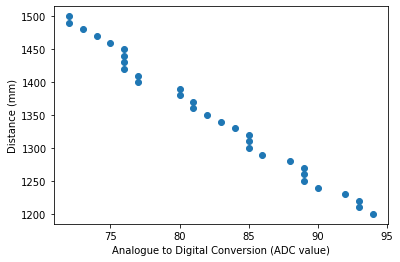

In [ ]:
plt.scatter(sensor.ADC,sensor.Distance)
plt.xlabel('Analogue to Digital Conversion (ADC value)')
plt.ylabel('Distance (mm)')
plt.show()

From this plot, we could find the correspondance between the ADC and distance. But more convenient would be to make a model using linear regression and *fit* a line to the points. This way, we could get the right relationship for any value of either.

<a id= 'Regression'> </a>

## 4. Linear Regression
The relationship between $x$ and $y$ can be modelled using a straight line equation that expresses $y$ in terms of $x$. In other words, variable $y$ is predicted by $x$ in terms of a linear relationship between the two. The method finds the straight line that best fits the data points, and expresses it as follows:

$$\hat y=a+bx + e$$

Where the constant $a$ is the *intercept* (the value of $y$ when $x=0$, sometimes denoted $b_0$), and the constant $b$ is a measure of the *inclination* (the "steepness" or "slope" or "gradient" of the line). And then there is $e$, the error - because of course our model will not be perfect. The error is also called the residual.

We can get the slope a from the correlation coefficient and sample standard deviations ($s_x$ and $s_y$)of the variables x and y:
$$b=r \frac{s_y}{s_x}$$

And the intercept from the slope and mean values of x and y:
$$a=\bar y -b \bar x$$


### Try out 4:
Apply a linear fit, print the output and identify a and b in the equation
 $Distance= a*ADC + b$

In [14]:
distmodel=np.polyfit(sensor.ADC,sensor.Distance,1)

# 1st order polynomial = Line, for more info see:
# help(np.polyfit)

print(distmodel)  
# for  decrease of 1 ADC the corresponding distance increases by... (first number)
# for  0 ADC output the corresponding distance would be... (second)

[ -13.35905977 2450.18321291]


It is important to check whether the output of the model makes sense in relation to the data. 

We can also check the prediction of our model by producing values according to it, and plot it with the original data.

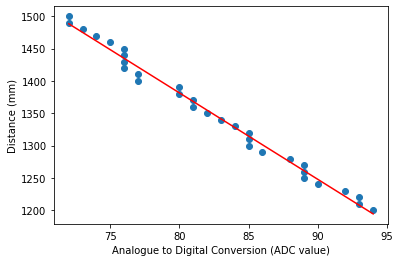

In [13]:
Distpred=np.poly1d(distmodel) # construct predicted output based on model

D_lin_reg=Distpred(sensor.ADC)
plt.scatter(sensor.ADC,sensor.Distance)
plt.plot(sensor.ADC,D_lin_reg, c='r')

plt.xlabel('Analogue to Digital Conversion (ADC value)')
plt.ylabel('Distance (mm)')
plt.show()

The difference between the red line and the actual data points give us a sense of the error in our model. The best-fitting line minimizes the error.

The regression model, and prediction of data based on it, is a fundamental concept of statistics and machine learning so there are plenty of packages to choose from. Often the data and models are often much more complex (involving more variables). 

It is important to stress that both correlation and linear regression express the *LINEAR* relationship between variables. There can be other, non-linear relationships in data that we should not use these methods for.

In the above plot, we have quite a good fit. But in our example, we have only used a only a small portion of the sensor range. We could use the full data available and see whether our model would also be useful for other ranges.

### Try out 5:
Get the full data (DistanceSensorData.csv,  https://lucidar.me/en/arduino/files/SHARP_Distance_Sensors.zip from https://lucidar.me/en/arduino/arduino-accurate-distance-measurement-sharp-GP2Y0A21YK/)
Load it and plot. Would it be suitable to perform a linear regression on the data? 

In [1]:
#Load the data. You can use pd.read_csv like the suggstion here:
# Sharp = pd.read_csv('DistanceSensorData.csv', delimiter = '\t',names=('Distance', 'ADC','Voltage'))

# remember to check shape and content of the data frame once loaded

# see what the correlation function and linear regression would put out.

<a id= 'VarianceExplained'> </a>

## 5. Variance explained by model

As we have seen, the prediction line accounts for some of the systematic variation in the data, while other variability is not accounted for (the error). A recurrent question is how much of the variability in data that the model accounts for, the variance explained. 

Now we will return to the *sums of squares*, because after all that is basically how we calculate the variance: as the squared distance between each data point and the mean.

One way to do this is to compare the total sum of squares $SS_T$ of all scores (the squared distance from all scores to the grand mean) with that of the model $SS_M$. 

Above we we have a linear regression model for related measurements, but the concept applies also to comparisons between experimental and control groups. 

In [12]:
# We generate some fake data for our example, 50 scores per group
# Make up scores of control group
cont_m=400
cont_std=210

# Make up scores of experimental group
exper_m=740
exper_std=205

Control_data=pd.Series(np.random.normal(cont_m, cont_std, 50))
Exper_data=pd.Series(np.random.normal(exper_m, exper_std, 50))

# We now concatenate all these data points into one Series
All_data=pd.concat([Control_data, Exper_data], axis=0) # axis 1 would mean we end up with two columns

# Get the description of all the data
all_stats=All_data.describe()
all_stats

All_mean=all_stats.iloc[1]
All_std=all_stats.iloc[2]

How much of the variance that we have is explained by the simple fact that we think the experimental and control group belong to different distributions?

Let's start with the total sum of squares
$$SS_T  =\sum{ (x_n - \bar{x})^2 }$$

In [13]:
#Sum of squares 
#all data points
SS_T=sum((All_data-All_mean)**2)


And then we have our model with two means different from the total mean. So the sum of squares simply squares the difference between the group means and the total, multiplied by the number in each group (no summation needed):

$$SS_M  =N_{cont}*(\bar{x}_{cont} - \bar{x})^2  +N_{exp}* (\bar{x}_{exp} - \bar{x})^2 $$


In [14]:
#The between-group sum of square is actually simpler
SS_M=Control_data.shape[0] * (cont_m-All_mean)**2 + Exper_data.shape[0] *(exper_m-All_mean)**2 


If our model is any good, it should account for a big portion of the variance in the data. That is, the data points should be close to the mean for that particular group.

We can now calculate the proportion of variance accounted for by the model compared to the total. This is also called Coefficient of determination $r^2$ (or  $R^2$):

$$ r^2 =\frac{SS_M}{SS_T}$$

Again we meet r as the measure the strength of linear relationships between variables. By squaring it, we have a proportion (or percentage) of the total variation the moddel accounts for. 


In [15]:
# Coefficient of determination

print('R_square:', SS_M/SS_T)

R_square: 0.4691800513001405


### Try out 6:
Calculate the effect size $r$ using the two Sum of Squares above (note that you must take the square root of $r^2$). Is the effect small, medium or large?